In [256]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import pathlib
import os
from dotenv import load_dotenv

In [257]:
import sys
import csv

csv.field_size_limit(100000000)

100000000

In [258]:
path_env = pathlib.Path(os.getcwd()).parent.parent / '.env'
path_env

PosixPath('/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/.env')

In [259]:
load_dotenv(path_env)
api_key = os.getenv("OPENAI_API_KEY")

os.environ["OPENAI_API_KEY"] = api_key

In [260]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [261]:
# Define the figure size and dpi
fig_width = 6.9  # inches
fig_height = 6.5  # inches
fig_dpi = 350

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,

    # Fonts
    'font.size': 3,

    # Axes
    'axes.labelsize': 6,
    'axes.titlesize': 6,
    'axes.linewidth': 1,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 1,
    'grid.color': 'gray',

    # Legend
    'legend.fontsize': 6,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,

    # Lines
    'lines.linewidth': 2.0,
    'lines.markersize': 2,
    'axes.labelsize': 6,
    'axes.titlesize': 6,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
})

In [262]:
df_es = pd.read_parquet("responses_df_es.parquet")
df_en = pd.read_parquet("responses_df_en.parquet")

In [263]:
df_en["id_tpc"] = range(len(df_en))
df_es["id_tpc"] = range(len(df_es))

In [298]:
df_en[df_en["add"] =="False"]

,topic,most_repr_docs,label,add,rationale,id_tpc
0,"[school, student, high, survey, day, youth, wo...",MMWR – Morbidity and Mortality Weekly Report M...,Adolescent Behavior and Education Analysis,False,The topic of the provided documents seems to f...,0
4,"[blood, cell, body, kidney, test, disease, inf...",15th ANNUAL EARLY HEARING DETECTION & INTERVEN...,Autoimmune Disorders,False,While the topic of autoimmune disorders is men...,4
5,"[exposure, health, chemical, control, study, e...",Add to cookbook Farmers Market Gazpacho Garlic...,Chemical Exposure and Health Risks,False,The provided documents do not directly address...,5
6,"[gene, genetic, syndrome, protein, mutation, c...",Coming to a Cleveland Clinic location?Hillcres...,Genetic Testing and Disorders,False,The provided documents do not directly address...,6
9,"[thyroid, hormone, tumor, level, thyroid_hormo...",SAMHSA Resources and Information Disaster Dist...,Thyroid Hormone and Tumor Control,False,The provided documents do not directly address...,9
10,"[information_technology, time, people, world_h...",News - Family Health New COVID-19 Guidelines D...,Information Technology and Health,False,The provided documents do not directly address...,10
11,"[asd, autism, autism_spectrum, increase, lung,...",Education and Training Fellowship Post Doctora...,Autism Spectrum Disorder (ASD),False,The provided documents do not directly address...,11
12,"[pain, arthritis, joint, rehabilitation, injur...","Viscosupplementation, Nerve hydrodissection, I...",Arthritis and Chronic Pain Management,False,While the topic of pain and arthritis is menti...,12
16,"[eye, vision, surgery, ophthalmology, contact_...",Cleveland Clinic neurological services at Medi...,Eye Health and Vision Care,False,The provided documents do not seem to directly...,16
23,"[technology, poncz_m, mining, social_medium, r...",COVID-19 Contact Tracing Communications Graphi...,Mining Technology and Safety,False,While the topic of mining technology and safet...,23


In [264]:
df_aux = df_en[df_en["add"] =="True"]
df_aux[df_aux.id_tpc == 8].label

8    Breastfeeding and Infant Feeding Practices
Name: label, dtype: object

In [265]:
df_aux[df_aux.id_tpc == 8].most_repr_docs.values.tolist()[0]

"Breastfeeding the High-Risk Newborn Click on the links below to learn more about this topic. Online Medical Reviewer: Date Last Reviewed: Unavailable Related Conditions - Adding to Mother's Milk - Breast Milk Collection and Storage - Breast Milk Expression - Breastfeeding and Delayed Milk Production - Breastfeeding and Returning To Work - Breastfeeding at Work - Breastfeeding Difficulties - Baby - Breastfeeding Difficulties - Mother - Breastfeeding: Getting Started - Breastfeeding: Returning to \nSautéed Beet Greens Don’t throw away your beet greens! The leafy tops of beets can be so tasty. In this recipe, lemon juice, vegetable oil, and seasonings give them a bold flavor profile. Ingredients - 2 teaspoons vegetable oil - 4 cups chopped beet greens (2 bunches with stems removed) - 2 cloves garlic, minced or 1/2 teaspoon garlic powder - 1 teaspoon lemon juice - 1/8 teaspoon red pepper flakes - 1 pinch salt Directions - Wash hands with soap and water. - Heat oil in a medium-sized pan ov

## Labels from EN/ES in 2D space based on Multilingual SentenceTransformer embeddings

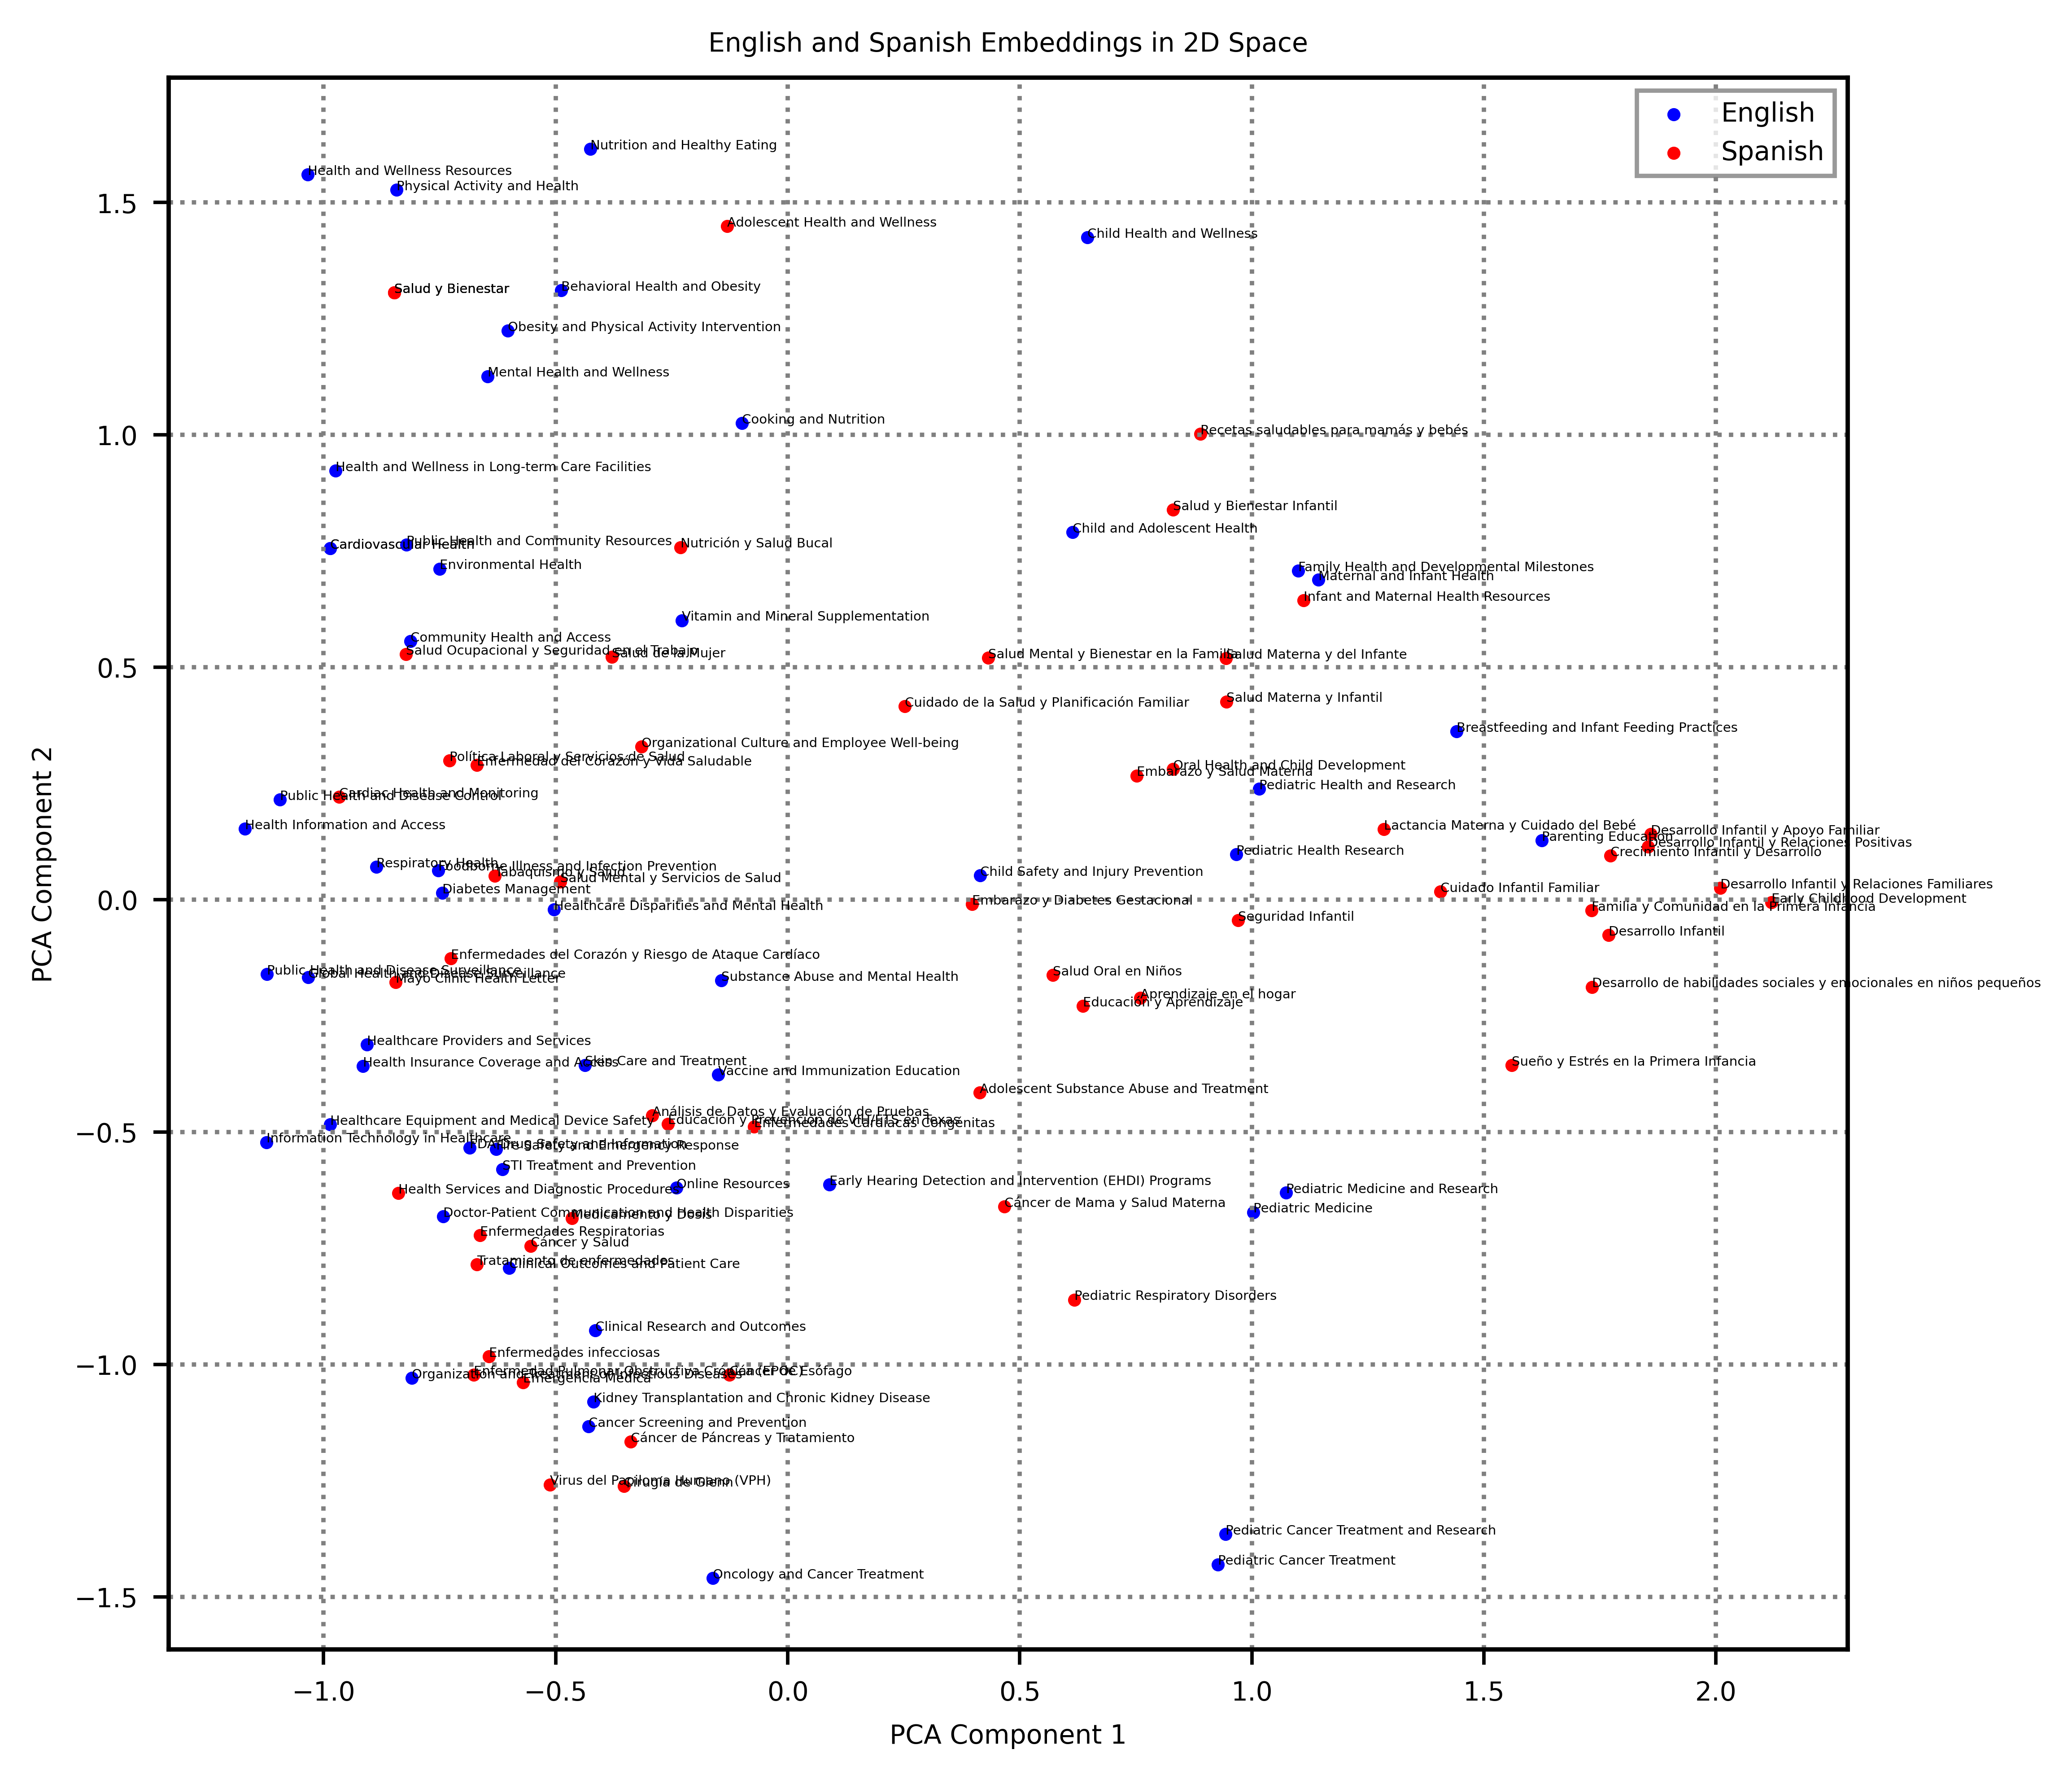

In [295]:
# Load multilingual sentence transformer models
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2', device='cuda')

# Sample English and Spanish documents
english_docs = df_en[df_en["add"]=="True"].label.values.tolist()
spanish_docs = df_es[df_es["add"]=="True"].label.values.tolist()

# Generate embeddings for English documents
english_embeddings = model.encode(english_docs)

# Generate embeddings for Spanish documents
spanish_embeddings = model.encode(spanish_docs)

# Concatenate the embeddings and create labels for plotting
all_embeddings = np.vstack([english_embeddings, spanish_embeddings])
labels = english_docs + spanish_docs

# Apply PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)

# Plot the embeddings with different colors for English and Spanish
plt.figure()
english_points = reduced_embeddings[:len(english_embeddings)]
spanish_points = reduced_embeddings[len(english_embeddings):]
plt.scatter(english_points[:, 0], english_points[:, 1], color='blue', label='English')
plt.scatter(spanish_points[:, 0], spanish_points[:, 1], color='red', label='Spanish')

# Add labels to the points
for i, label in enumerate(labels):
    plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('English and Spanish Embeddings in 2D Space')
plt.legend()
plt.grid(True)
plt.savefig("example_0.1.png")
plt.show()


In [267]:
# Calculate cosine similarity matrix between English and Spanish embeddings
similarity_matrix = cosine_similarity(english_embeddings, spanish_embeddings)

# Find best correspondences (for simplicity, just use argmax)
best_matches = np.argmax(similarity_matrix, axis=1)

# Print the matches
for idx, match_idx in enumerate(best_matches):
    if english_docs[idx] == "Breastfeeding and Infant Feeding Practices":
        print(f"English Topic {idx}: {english_docs[idx]}")
        print(f"Spanish Topic {match_idx}: {spanish_docs[match_idx]}")
        print()

English Topic 4: Breastfeeding and Infant Feeding Practices
Spanish Topic 36: Lactancia Materna y Cuidado del Bebé



## Retriever

In [7]:
from langchain_community.document_loaders.csv_loader import CSVLoader

In [105]:
# Original Rosie corpora
path_orig_corpus_es = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/corpus_strict_v2.0_es_compiled_documents_lang.parquet"
path_orig_corpus_en = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/corpus_strict_v3.0_en_compiled_documents_lang.parquet"

# Proccessed Rosie corpora
path_df_processed = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/df_0.1.parquet"

# Path save csv for LangChain index
path_to_index = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/to_index"

# Path models
model_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/LDA/rosie_0.1_100"

In [16]:
df_orig_corpus_en = pd.read_parquet(path_orig_corpus_en)
df_orig_corpus_es = pd.read_parquet(path_orig_corpus_es)
df_processed = pd.read_parquet(path_df_processed)

In [86]:
# Read corpora that was used for training (missing here should be inferred)
corpus_files = ["EN", "ES"]
dfs_train = []
for en in corpus_files:
    print(en)
    # Read corpus file with training data
    corpusFile = pathlib.Path(model_path).joinpath(f"train_data/corpus_{en}.txt")
    with corpusFile.open("r", encoding="utf-8") as f:
        lines = [line for line in f.readlines()]
    corpus = [line.rsplit(" 0 ")[1].strip().split() for line in lines if line.rsplit(" 0 ")[1].strip().split() != []]
    ids = [line.rsplit(" 0 ")[0].strip() for line in lines if line.rsplit(" 0 ")[1].strip().split() != []]
    df_train = pd.DataFrame({"lemmas": [" ".join(doc) for doc in corpus]})
    df_train["doc_id"] = ids
    df_train["id_top"] = range(len(df_train))

    
    # Read thetas 
    thetas = sparse.load_npz( pathlib.Path(model_path).joinpath(f"mallet_output/{en}/thetas.npz")).toarray()
    def get_thetas_str(row,thetas):
        return " ".join([f"{id_}|{round(el, 4)}" for id_,el in enumerate(thetas[row]) if el!=0.0])
    
    def get_most_repr_tpc(row,thetas):
        return np.argmax(thetas[row])

    df_train["thetas"] = df_train.apply(lambda row: get_thetas_str(row['id_top'], thetas), axis=1)
    df_train["id_tpc"] = df_train.apply(lambda row: get_most_repr_tpc(row['id_top'], thetas), axis=1)
    
    if en == "EN":
        df_train = df_train.merge(df_en, how="left", on="id_tpc")
    elif en == "ES":
        df_train = df_train.merge(df_es, how="left", on="id_tpc")
    
    dfs_train.append(df_train)
    print(len(df_train))
df_train = pd.concat(dfs_train)
df_train

EN
34055
ES
10102


,lemmas,doc_id,id_top,thetas,id_tpc,topic,most_repr_docs,label,add,rationale
0,appendicitis general antibiotic recommendation...,EN_0,0,10|0.017400000244379044 31|0.24480000138282776...,46,"[patient, study, treatment, organization, worl...","- Speech by - Scott Gottlieb, M.D. The Pew Cha...",Organization and Treatment of Infectious Diseases,True,The topic of antimicrobial resistance and the ...
1,collagen_collagen collagen kol jin protein bod...,EN_1,1,6|0.07429999858140945 34|0.21459999680519104 5...,50,"[symptom, information_technology, treatment, c...","Locations Patients from around the Washington,...",Pediatric Cancer Treatment and Research,True,"The provided documents mention pediatric care,..."
2,community pharmacists contribution disease man...,EN_2,2,7|0.016100000590085983 14|0.003899999894201755...,65,"[health, program, community, public, support, ...",Using Hair Dyes and Color During Pregnancy Is ...,Public Health and Community Resources,True,The topic of public health and community resou...
3,cancer diagnosis tip cope diagnose cancer know...,EN_3,3,2|0.155799999833107 10|0.4790000021457672 45|0...,10,"[information_technology, time, people, world_h...",News - Family Health New COVID-19 Guidelines D...,Information Technology and Health,False,The provided documents do not directly address...
4,volume september special topic structured mana...,EN_4,4,7|0.035100001841783524 28|0.003700000001117587...,65,"[health, program, community, public, support, ...",Using Hair Dyes and Color During Pregnancy Is ...,Public Health and Community Resources,True,The topic of public health and community resou...
...,...,...,...,...,...,...,...,...,...,...
10097,imprimir_departamentos especialidad_mayo clini...,ES_10105,10097,34|0.004100000020116568 61|0.01920000091195106...,95,"[médico_apellido, comenzar_letra, buscar, comi...",El fortalecimiento de la fuerza laboral es una...,Cuidado Infantil Familiar,True,The topic of the provided documents seems to f...
10098,problema respiratorio asma enfermedad_pulmonar...,ES_10106,10098,4|0.01899999938905239 9|0.08839999884366989 12...,78,"[examen, proveedor, ed_philadelphia, pa_elsevi...",CIUDAD DE NUEVA YORK — En honor al Mes de la S...,Salud Sexual y Reproductiva,False,While the topic of sexual and reproductive hea...
10099,centro enfermedades_infecciosas texas_tcid ing...,ES_10107,10099,1|0.3082999885082245 6|0.009600000455975533 14...,1,"[salud, texas, salud_mental, programa, servici...",Preguntas a expertos Mi hija de 5 años tiene m...,Salud Mental y Servicios de Salud,True,The topic of mental health and services is pro...
10100,preocupar consumo_droga alcohol ayuda disponib...,ES_10108,10100,9|0.3330000042915344 20|0.14249999821186066 26...,9,"[servicio, él, seguro, programa, persona, reci...",Los programas para la primera infancia mantien...,Infant and Maternal Health Resources,True,The topic of these documents seems to focus on...


In [90]:
# Merge df_processed with df_train to get thetas information on the documents that were used for training
df_processed_with_train_info = df_processed.merge(df_train, how="left", on="doc_id")
columns_keep = df_processed_with_train_info.columns.tolist() + ["url", "has_trigger_word"]

In [281]:
df_processed_en = df_processed_with_train_info.merge(df_orig_corpus_en, how="left", on="document_id").rename(columns={"lang_x": "lang"})[columns_keep]
df_processed_es = df_processed_with_train_info.merge(df_orig_corpus_es, how="left", on="document_id").rename(columns={"lang_x": "lang"})[columns_keep]
df_processed_all = pd.concat([df_processed_en, df_processed_es])
df_processed_all = df_processed_all.drop_duplicates('doc_id')


# Group by 'lang' and 'id_tpc'
grouped = df_processed_all.groupby(['lang', 'id_tpc'])

# Iterate through groups and save each to a CSV file
for group_name, group_df in grouped:
    lang, id_tpc = group_name
    filename = pathlib.Path(path_to_index) / f'{lang}_{id_tpc}.csv'
    group_df[["text"]].to_csv(filename, index=False)

df_processed_all

,id_preproc,lemmas_x,lemmas_tr,doc_id,text,text_tr,lang,document_id,lemmas_y,id_top,thetas,id_tpc,topic,most_repr_docs,label,add,rationale,url,has_trigger_word
0,0,appendicitis general antibiotic recommendation...,apendicitis recomendaciones antibióticas gener...,EN_0,Appendicitis — General Antibiotic Recommendati...,Apendicitis — Recomendaciones Antibióticas Gen...,EN,0,appendicitis general antibiotic recommendation...,0,10|0.017400000244379044 31|0.24480000138282776...,46,"[patient, study, treatment, organization, worl...","- Speech by - Scott Gottlieb, M.D. The Pew Cha...",Organization and Treatment of Infectious Diseases,True,The topic of antimicrobial resistance and the ...,https://newmomhealth.com/,True
1,1,collagen_collagen collagen kol jin protein bod...,colágeno_colágeno colágeno_proteína cuerpo tip...,EN_1,What Is Collagen? What Is Collagen? Collagen (...,¿Qué es el colágeno? ¿Qué es el colágeno? El c...,EN,1,collagen_collagen collagen kol jin protein bod...,1,6|0.07429999858140945 34|0.21459999680519104 5...,50,"[symptom, information_technology, treatment, c...","Locations Patients from around the Washington,...",Pediatric Cancer Treatment and Research,True,"The provided documents mention pediatric care,...",https://newmomhealth.com/mamastories/obreaking...,True
2,2,community pharmacists contribution disease man...,contribuciones farmacéuticos comunitarios mane...,EN_2,Community Pharmacists’ Contributions to Diseas...,Contribuciones de Farmacéuticos Comunitarios a...,EN,2,community pharmacists contribution disease man...,2,7|0.016100000590085983 14|0.003899999894201755...,65,"[health, program, community, public, support, ...",Using Hair Dyes and Color During Pregnancy Is ...,Public Health and Community Resources,True,The topic of public health and community resou...,https://newmomhealth.com/mamastories/past-7-we...,True
3,3,cancer diagnosis tip cope diagnose cancer know...,diagnóstico cáncer consejo hacer él diagnostic...,EN_3,Cancer diagnosis: 11 tips for coping If you've...,Diagnóstico del cáncer: 11 consejos para hacer...,EN,3,cancer diagnosis tip cope diagnose cancer know...,3,2|0.155799999833107 10|0.4790000021457672 45|0...,10,"[information_technology, time, people, world_h...",News - Family Health New COVID-19 Guidelines D...,Information Technology and Health,False,The provided documents do not directly address...,https://newmomhealth.com/mamastories1,True
4,4,volume september special topic structured mana...,volume_september special_topic structured mana...,EN_4,"Volume 10 — September 12, 2013 SPECIAL TOPIC A...","Volume 10 — September 12, 2013 SPECIAL TOPIC A...",EN,4,volume september special topic structured mana...,4,7|0.035100001841783524 28|0.003700000001117587...,65,"[health, program, community, public, support, ...",Using Hair Dyes and Color During Pregnancy Is ...,Public Health and Community Resources,True,The topic of public health and community resou...,https://newmomhealth.com/mamastories/expect-fi...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44152,10097,imprimir_departamentos especialidad_mayo clini...,print_departments specialities_mayo clinic lar...,ES_10105,Imprimir Departamentos y especialidades Mayo C...,Print Departments and Specialities Mayo Clinic...,ES,10105,imprimir_departamentos especialidad_mayo clini...,10097,34|0.004100000020116568 61|0.01920000091195106...,95,"[médico_apellido, comenzar_letra, buscar, comi...",El fortalecimiento de la fuerza laboral es una...,Cuidado Infantil Familiar,True,The topic of the provided documents seems to f...,https://www.cdc.gov/listeria/outbreaks/porkpro...,False
44153,10098,problema respiratorio asma enfermedad_pulmonar...,breathing problem asthma copd travel precautio...,ES_10106,Si tiene problemas respiratorios como asma o E...,If you have breathing problems such as asthma ...,ES,10106,problema respiratorio asma enfermedad_pulmonar...,10098,4|0.01899999938905239 9|0.08839999884366989 12...,78,"[examen, pro

In [118]:
#[print(item) for item in pathlib.Path(path_to_index).iterdir()]

In [ ]:
# Create index
test_en = pathlib.Path(path_to_index) / f"EN_{4}.csv"
test_es = pathlib.Path(path_to_index) / f"EN_{36}.csv"

loader_en = CSVLoader(
    file_path=test_en,
    source_column="doc_id",
    csv_args={
        "fieldnames": ["doc_id", "text", "url"],
    })


#loader_es = CSVLoader(file_path=test_es)
data_en = loader_en.load()
#data_es = loader_es.load()
#data_en

In [241]:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA, RetrievalQAWithSourcesChain
from langchain.document_loaders import TextLoader
from langchain.document_loaders import DirectoryLoader
from langchain.chat_models import ChatOpenAI
from langchain.docstore.document import Document
from langchain_core.prompts import PromptTemplate

In [138]:
# We will work with the english document as BASE

#splitting the text into
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts = text_splitter.split_documents(data_en)
print(len(texts))
print(texts[3])

1763
page_content="problems. What are the symptoms? Symptoms of acute kidney injury may include: - Little or no urine when you try to urinate. - Swelling, especially in your legs and feet. - Not feeling like eating. - Nausea and vomiting. - Feeling confused, anxious and restless, or sleepy. - Pain in the back just below the rib cage. This is called flank pain. Some people may not have any symptoms. And for people who are already quite ill, the problem that's causing the kidney injury may be causing other symptoms. How is it diagnosed? Acute kidney injury is most often diagnosed during a hospital stay for another cause. If you are already in the hospital, tests done for other problems may find your kidney problem. If you're not in the hospital but have symptoms of kidney injury, your doctor will ask about your symptoms, what medicines you take, and what tests you have had. Your symptoms can help point to the cause of your kidney problem. Blood and urine tests can check how well your kid

In [149]:
# Embed and store the texts
# Supplying a persist_directory will store the embeddings on disk
persist_directory = (pathlib.Path(path_to_index) / 'db').as_posix()

In [152]:
embedding = OpenAIEmbeddings()

vectordb = Chroma.from_documents(documents=texts, 
                                 embedding=embedding,
                                 persist_directory=persist_directory)

In [ ]:
# persiste the db to disk
vectordb.persist()
vectordb = None

In [ ]:
# Now we can load the persisted database from disk, and use it as normal. 
vectordb = Chroma(persist_directory=persist_directory, 
                  embedding_function=embedding)

In [166]:
retriever = vectordb.as_retriever(search_kwargs={"k": 1})

In [167]:
# Set up the turbo LLM
turbo_llm = ChatOpenAI(
    temperature=0,
    model_name='gpt-3.5-turbo'
)

In [168]:
# create the chain to answer questions 
qa_chain = RetrievalQA.from_chain_type(
    llm=turbo_llm, 
    chain_type="stuff", 
    retriever=retriever, 
    return_source_documents=True,
    verbose=True,
    chain_type_kwargs={
        "verbose": True,
    }
)

In [175]:
# full example
query = "How long should I breastfeed my baby?"
llm_response = qa_chain(query)

llm_response



> Entering new RetrievalQA chain...


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: Use the following pieces of context to answer the user's question. 
If you don't know the answer, just say that you don't know, don't try to make up an answer.
----------------
after the baby is born and goes away by the time a baby is 2 weeks old. Babies can get jaundice if they: - are born early. Premature babies are even less ready to remove bilirubin. They also can have problems at lower bilirubin levels than babies born later. Doctors treat them sooner. - don't get enough breast milk. This often happens in the first few weeks of life, because a mother's milk isn't in yet or the baby has trouble breastfeeding. If a baby has this type of jaundice (called breastfeeding jaundice), it's best to feed more often as it can lower the risk of jaundice. A breastfeeding (lactation) consultant can help. - are breastfed. In some babies, breast m

{'query': 'How long should I breastfeed my baby?',
 'result': "The World Health Organization (WHO) recommends exclusive breastfeeding for the first six months of a baby's life, followed by continued breastfeeding along with appropriate complementary foods up to two years of age or beyond. It's best to consult with a healthcare provider or a lactation consultant for personalized advice based on your baby's specific needs.",
 'source_documents': [Document(page_content="after the baby is born and goes away by the time a baby is 2 weeks old. Babies can get jaundice if they: - are born early. Premature babies are even less ready to remove bilirubin. They also can have problems at lower bilirubin levels than babies born later. Doctors treat them sooner. - don't get enough breast milk. This often happens in the first few weeks of life, because a mother's milk isn't in yet or the baby has trouble breastfeeding. If a baby has this type of jaundice (called breastfeeding jaundice), it's best to f

## Create default VectorDB with one document

In [283]:
example_document = "WHO and UNICEF recommend that children initiate breastfeeding within the first hour of birth and be exclusively breastfed for the first 6 months of life – meaning no other foods or liquids are provided, including water. Infants should be breastfed on demand – that is as often as the child wants, day and night. No bottles, teats or pacifiers should be used. From the age of 6 months, children should begin eating safe and adequate complementary foods while continuing to breastfeed for up to two years of age or beyond."
url = "https://www.who.int/health-topics/breastfeeding#tab=tab_2"

doc =  Document(page_content=example_document, metadata={"url": "local", "source": "initial"})
doc

Document(page_content='WHO and UNICEF recommend that children initiate breastfeeding within the first hour of birth and be exclusively breastfed for the first 6 months of life – meaning no other foods or liquids are provided, including water. Infants should be breastfed on demand – that is as often as the child wants, day and night. No bottles, teats or pacifiers should be used. From the age of 6 months, children should begin eating safe and adequate complementary foods while continuing to breastfeed for up to two years of age or beyond.', metadata={'url': 'local', 'source': 'initial'})

In [284]:
# Create text splitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

In [285]:
# Embed and store the texts
# Supplying a persist_directory will store the embeddings on disk
persist_directory = (pathlib.Path(path_to_index) / 'db').as_posix()

# Define embeddings
embedding = OpenAIEmbeddings()

# Create vector DB
vectordb = Chroma.from_documents(
    documents=[doc], 
    embedding=embedding,
    persist_directory=persist_directory)

# Persist the db to disk
#vectordb = None

In [292]:
prompt_template = """

Please analyze the given documents and compare them with the new document to identify any contradictions.
Note that in detecting contradictions, only instances where the new document directly contradicts information present in the provided documents
should be considered. As contradiction we understand: 'You should breastfeed your baby for six months" and 'Breastfeeding is only necessary for 1 month'. If the new document introduces new information not mentioned in the other documents, it should not be treated as a contradiction.
Documents:
{summaries}

New document:
{question}
--------------------
If you find any contradiction, your answer should have the following format: CONTRADCTION - CONTRADICTIONS detected'. Otherwise, your answer should just be 'CONSISTENT'.
"""

from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(template= prompt_template)

In [287]:
texts = text_splitter.split_documents(data_en)
len(texts)

1560

In [293]:
texts = text_splitter.split_documents(data_en)

contradictions = []
for text in texts:#[:10]:
        
    chain = RetrievalQAWithSourcesChain.from_chain_type(
    llm=turbo_llm,
    retriever=vectordb.as_retriever(),
    chain_type="stuff",
    #verbose=True,
    chain_type_kwargs={
        #"verbose": True,
        "prompt": prompt_template,
    })
    
    d_response = chain({"question": text.page_content})
    if d_response["answer"] != "CONSISTENT":
        print("Response: ", d_response["answer"])

Response:  CONTRADICTION - The new document mentions inserting a needle into an artery for a blood test, while the other documents specifically mention using a vein for blood tests.
